What is the most optimal skill to learn for Data Analysts

Methodology 
1. Group skills to determine median salary and likelihood of being in posting
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

In [6]:
#import libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#import data
df = pd.read_csv("data_jobs.csv")


#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#Convert Job Skills from String to List
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
df_da_ph = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] ==  'Philippines')].copy()
df_da_ph

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
76,Data Analyst,Data Analyst - 14785091749,Anywhere,via Jobgether,Full-time,True,Philippines,2023-08-26 13:13:26,False,False,Philippines,NaN,NaN,NaN,Support Shepherd,"[sql, python, r, excel, tableau, power bi]","{'analyst_tools': ['excel', 'tableau', 'power ..."
416,Data Analyst,Data Analyst,"Cebu City, Cebu, Philippines",via Trabajo.org,Full-time,False,Philippines,2023-02-28 13:29:02,True,False,Philippines,NaN,NaN,NaN,LegalMatch.com,"[sql, javascript, python, java, excel, looker,...","{'analyst_tools': ['excel', 'looker', 'tableau..."
422,Data Analyst,Data Analyst (KYC DBNL),Philippines,via Epicareer,Full-time,False,Philippines,2023-08-23 13:13:41,False,False,Philippines,NaN,NaN,NaN,ING Philippines,"[sas, sas, go, sql, cognos, power bi]","{'analyst_tools': ['sas', 'cognos', 'power bi'..."
698,Data Analyst,12241303440 - Data Analyst,Anywhere,via LinkedIn,NaN,True,Philippines,2023-03-31 13:24:47,True,False,Philippines,NaN,NaN,NaN,Support Shepherd,"[sql, visual basic, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
925,Data Analyst,Junior Data Analyst,"Makati, Metro Manila, Philippines",via BeBee,NaN,False,Philippines,2023-11-25 13:06:55,False,False,Philippines,NaN,NaN,NaN,Institutional Shareholder Services Philippines,"[vba, sql, excel, ms access]","{'analyst_tools': ['excel', 'ms access'], 'pro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785296,Data Analyst,Data and Reports Analyst,"Quezon City, Metro Manila, Philippines",via LinkedIn,NaN,False,Philippines,2023-05-25 06:10:43,True,False,Philippines,NaN,NaN,NaN,Dynamic Business Outsourcing Solutions (DBOS),[power bi],{'analyst_tools': ['power bi']}
785309,Data Analyst,Data Analyst,"Taguig, Metro Manila, Philippines",via LinkedIn,NaN,False,Philippines,2023-01-12 06:15:57,False,False,Philippines,NaN,NaN,NaN,Trip.com Group,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
785533,Data Analyst,Data Analyst,"Taguig, Metro Manila, Philippines",via LinkedIn,NaN,False,Philippines,2023-01-23 06:15:25,True,False,Philippines,NaN,NaN,NaN,HelloConnect,"[sql, python, pandas, tableau, flow]","{'analyst_tools': ['tableau'], 'libraries': ['..."
785560,Data Analyst,Data Architect | Cebu,"Cebu City, Cebu, Philippines",via Kalibrr,Full-time,False,Philippines,2023-01-04 15:59:42,False,False,Philippines,NaN,NaN,NaN,Accenture Philippines,NaN,NaN


In [8]:
df_da_ph = df_da_ph.dropna(subset=['salary_year_avg'])

df_da_ph_exploded = df_da_ph.explode('job_skills')
df_da_ph_exploded[['salary_year_avg', 'job_skills']].head()

,salary_year_avg,job_skills
115695,111175.0,excel
115695,111175.0,tableau
147342,50400.0,NaN
166142,111175.0,sql
166142,111175.0,flow


In [9]:
df_da_skills = df_da_ph_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_da_skills = df_da_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

da_job_count = len(df_da_ph)

df_da_skills['skill_percent'] = df_da_skills['skill_count'] / da_job_count * 100

skill_percent = 5

df_da_skills_high_demand = df_da_skills[df_da_skills['skill_percent'] > skill_percent]

df_da_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,13,100500.0,54.166667
excel,9,89204.0,37.500000
tableau,7,100500.0,29.166667
python,7,100500.0,29.166667
r,6,100500.0,25.000000
power bi,5,69900.0,20.833333
word,3,57500.0,12.500000
snowflake,3,98500.0,12.500000
powerpoint,3,100500.0,12.500000


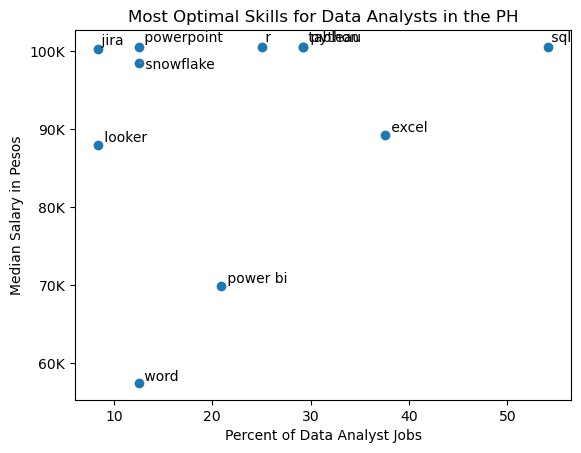

In [10]:
from adjustText import adjust_text

plt.scatter(df_da_skills_high_demand['skill_percent'], df_da_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary in Pesos')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the PH')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_da_skills_high_demand.index):
    texts.append(plt.text(df_da_skills_high_demand['skill_percent'].iloc[i], df_da_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()